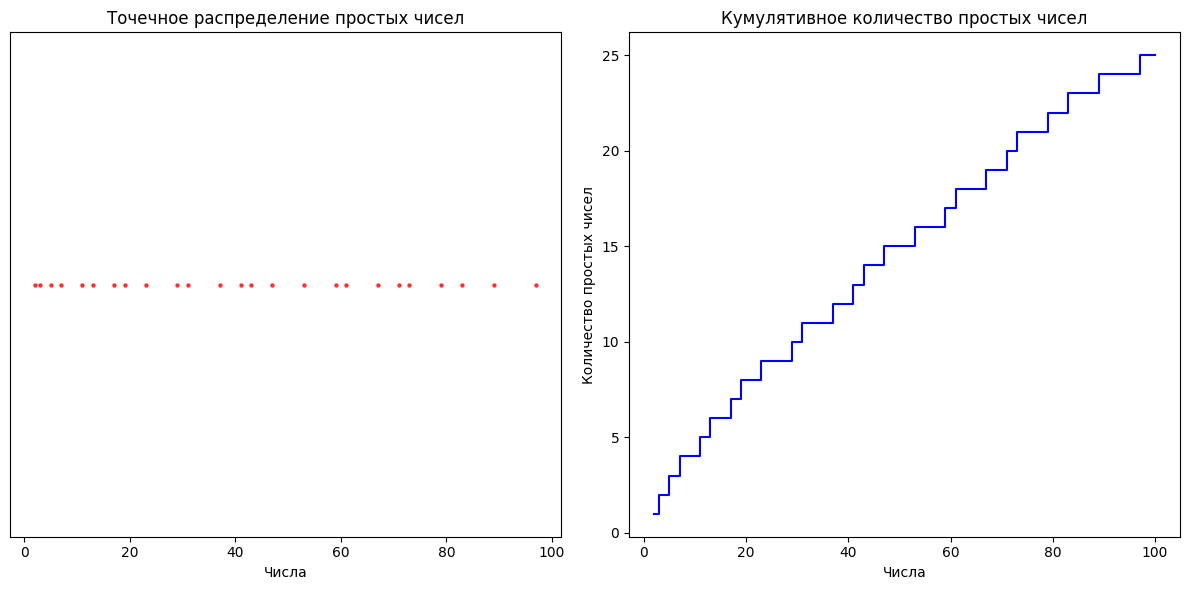

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sieve_of_eratosthenes(n):
    """Генерирует все простые числа до n с помощью решета Эратосфена."""
    sieve = np.ones(n + 1, dtype=bool)
    sieve[0] = sieve[1] = False
    for i in range(2, int(np.sqrt(n)) + 1):
        if sieve[i]:
            sieve[i*i::i] = False
    primes = np.where(sieve)[0]
    return primes

def plot_prime_distribution(max_num):
    """Визуализирует распределение простых чисел до max_num."""
    primes = sieve_of_eratosthenes(max_num)
    numbers = np.arange(2, max_num + 1)  # Начинаем с 2, так как 1 не простое

    # Создаем массив, где 1 - простое число, 0 - составное
    is_prime = np.isin(numbers, primes).astype(int)

    plt.figure(figsize=(12, 6))

    # Визуализация распределения
    plt.subplot(1, 2, 1)
    plt.scatter(primes, [0.5] * len(primes), color='red', s=5, alpha=0.7)
    plt.title('Точечное распределение простых чисел')
    plt.xlabel('Числа')
    plt.yticks([])

    # Визуализация "шагов" (плотность простых чисел)
    plt.subplot(1, 2, 2)
    plt.step(numbers, np.cumsum(is_prime), where='post', color='blue')
    plt.title('Кумулятивное количество простых чисел')
    plt.xlabel('Числа')
    plt.ylabel('Количество простых чисел')

    plt.tight_layout()
    plt.show()

# Пример использования
max_number = 100  # Можно изменить на любое другое число
plot_prime_distribution(max_number)

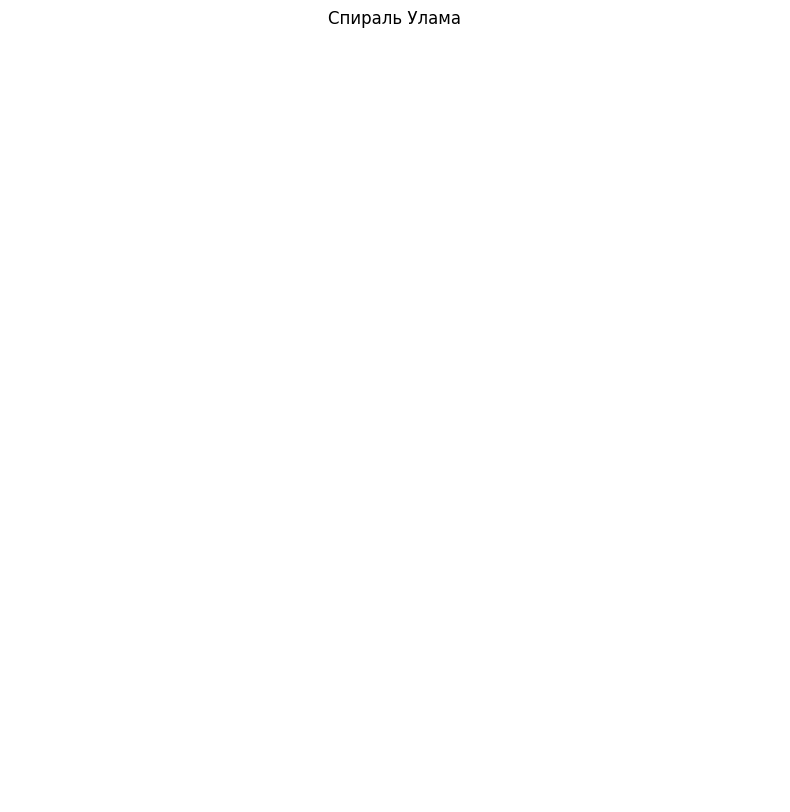

In [8]:
def plot_ulam_spiral(max_num):
    """Визуализирует спираль Улама для простых чисел до max_num."""
    primes = sieve_of_eratosthenes(max_num)
    size = int(np.ceil(np.sqrt(max_num)))
    spiral = np.zeros((size, size), dtype=int)

    # Заполняем спираль числами
    x, y = size // 2, size // 2
    dx, dy = 0, -1
    current_num = 1

    for _ in range(size * size):
        if 1 <= current_num <= max_num:
            spiral[y, x] = 1 if current_num in primes else 0
        if x == y or (x > size // 2 and x == y + 1) or (x < size // 2 and x == -y):
            dx, dy = -dy, dx  # Поворот
        x += dx
        y += dy
        current_num += 1

    plt.figure(figsize=(10, 10))
    plt.imshow(spiral, cmap='binary', interpolation='nearest')
    plt.title('Спираль Улама')
    plt.axis('off')
    plt.show()

plot_ulam_spiral(1)